# Digital Image Processing — Week 3 Task Notebook

**Spring 2026**
**Topic:** Image I/O, grayscale/binary, cropping (ROI), color spaces, and basic arithmetic operations

**Student name:** Aziz Rixsiev   
**Student ID:** 230849   
**Date:** 2026-02-12   


## Task 0) Environment Check

In [1]:
# Imports (run once)
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2

from skimage import data

print("OpenCV:", cv2.__version__)


OpenCV: 4.13.0


## Helper Functions (Provided)

These helpers keep image display consistent and keep arithmetic results in the valid `uint8` range `[0, 255]`.


In [2]:
def to_rgb(img_bgr_or_rgb):
    """Ensure image is RGB uint8."""
    if img_bgr_or_rgb is None:
        raise ValueError("Image is None. Check the path or loading step.")
    img = img_bgr_or_rgb
    if img.ndim == 2:
        return img
    # If it came from cv2.imread it's BGR; if from skimage it's RGB.
    # We detect by heuristic: assume cv2 format if loaded via cv2.imread.
    return img

def load_image(path=None):
    """Load an RGB image. If path is missing, fall back to a built-in sample."""
    if path and os.path.exists(path):
        bgr = cv2.imread(path, cv2.IMREAD_COLOR)
        if bgr is None:
            raise ValueError(f"Failed to read: {path}")
        rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
        return rgb
    # offline sample (RGB)
    return data.astronaut()

def show_side_by_side(img1, img2, title1="Image 1", title2="Image 2", cmap1=None, cmap2=None):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1); plt.imshow(img1, cmap=cmap1); plt.title(title1); plt.axis('off')
    plt.subplot(1,2,2); plt.imshow(img2, cmap=cmap2); plt.title(title2); plt.axis('off')
    plt.axis('off')
    plt.show()

def clip_uint8(x):
    """Clip and convert to uint8."""
    return np.clip(x, 0, 255).astype(np.uint8)


## Task 1) Load an Image

Preferred: place an image file in the same folder and set `IMAGE_PATH`.

If `IMAGE_PATH=None`, the notebook uses `skimage.data.astronaut()` as an offline sample image.


Image shape (H, W, C): (512, 512, 3) | dtype: uint8


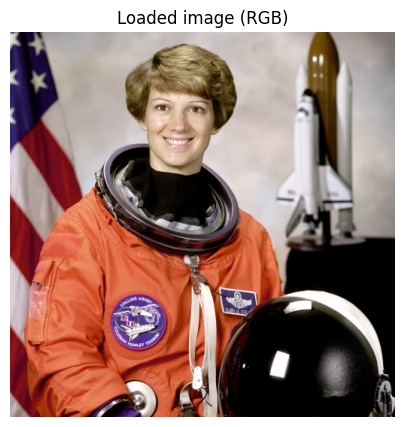

In [3]:
IMAGE_PATH = None

img = load_image(IMAGE_PATH)
print("Image shape (H, W, C):", img.shape, "| dtype:", img.dtype)

plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title("Loaded image (RGB)")
plt.axis("off")
plt.show()


## Task 2) Image I/O Basics

### Task 2.1 — Inspect Pixels
1. Print the pixel value at `(row=0, col=0)` and at the image center.
2. Explain what the 3 numbers represent in an RGB image.


In [4]:
# Task 2.1: print two pixel values
h, w = img.shape[:2]
print("Top-left pixel:", img[0, 0])
print("Center pixel:", img[h // 2, w // 2])


Top-left pixel: [154 147 151]
Center pixel: [19 14  7]


**Task 2.1 (Answer):**
- Each pixel has 3 values `[R, G, B]` representing red, green, and blue intensities from `0` to `255`.
- The top-left and center pixels differ because they belong to different image regions with different colors.


### Task 2.2 — Save and Reload
Save the loaded image as `output_saved.png`, then load it again and verify:
- the shape is unchanged
- the dtype remains `uint8`


Reloaded shape: (512, 512, 3) | dtype: uint8


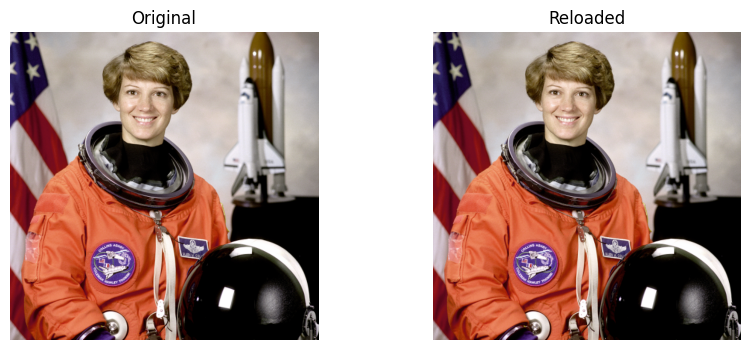

In [5]:
# Task 2.2: save and reload image
out_path = "output_saved.png"

# OpenCV expects BGR when writing files
bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite(out_path, bgr)

reloaded_bgr = cv2.imread(out_path, cv2.IMREAD_COLOR)
reloaded_rgb = cv2.cvtColor(reloaded_bgr, cv2.COLOR_BGR2RGB)

print("Reloaded shape:", reloaded_rgb.shape, "| dtype:", reloaded_rgb.dtype)
show_side_by_side(img, reloaded_rgb, "Original", "Reloaded")


## Task 3) Grayscale and Binary Images

### Task 3.1 — Convert to Grayscale
Convert RGB to grayscale with OpenCV and display original vs grayscale.


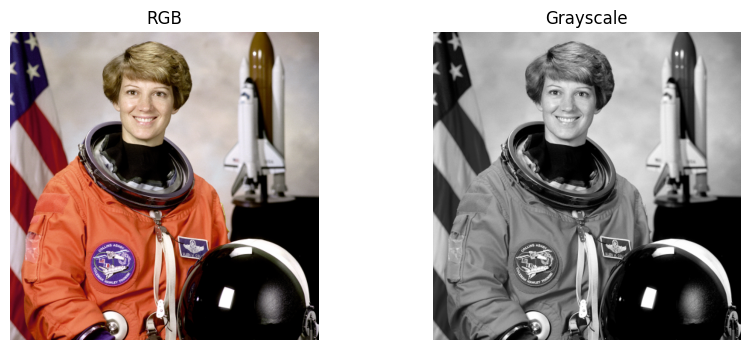

Gray shape: (512, 512) | dtype: uint8


In [6]:
# Task 3.1: grayscale conversion
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
show_side_by_side(img, gray, "RGB", "Grayscale", cmap2="gray")
print("Gray shape:", gray.shape, "| dtype:", gray.dtype)


### Task 3.2 — Threshold to Binary
1. Create a binary image with a manual threshold (`T=128`).
2. Create a binary image with Otsu's method.
3. Compare both results in 1-2 sentences.


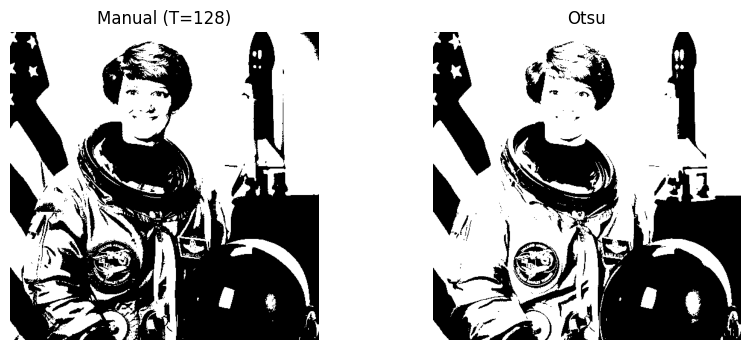

Otsu threshold chosen by OpenCV: 100.0


In [7]:
# Task 3.2: manual and Otsu thresholding
manual_threshold = 128
_, binary_manual = cv2.threshold(gray, manual_threshold, 255, cv2.THRESH_BINARY)

otsu_threshold, binary_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

show_side_by_side(binary_manual, binary_otsu, f"Manual (T={manual_threshold})", "Otsu", cmap1="gray", cmap2="gray")
print("Otsu threshold chosen by OpenCV:", otsu_threshold)


**Task 3.2 (Answer):**
- Manual thresholding uses a fixed cutoff, so its result depends on the chosen value.
- Otsu automatically selects a threshold from the histogram, usually giving cleaner foreground/background separation when intensity groups are distinct.


## Task 4) Cropping (ROI)

### Task 4.1 — Crop a Region of Interest
Pick ROI coordinates with array slicing `img[y1:y2, x1:x2]`, then display the original and cropped ROI.


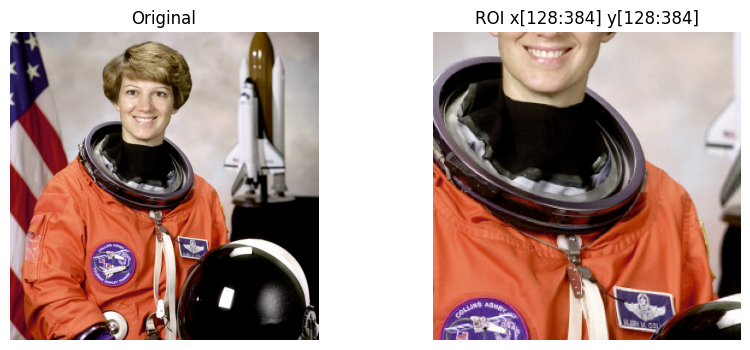

ROI shape: (256, 256, 3)


In [8]:
# Task 4.1: crop ROI using image dimensions
h, w = img.shape[:2]
x1, y1 = int(0.25 * w), int(0.25 * h)
x2, y2 = int(0.75 * w), int(0.75 * h)

roi = img[y1:y2, x1:x2].copy()
show_side_by_side(img, roi, "Original", f"ROI x[{x1}:{x2}] y[{y1}:{y2}]")
print("ROI shape:", roi.shape)


### Task 4.2 — Explain Coordinates
Explain why slicing is `img[y, x]` (row-major order) instead of `img[x, y]`.


**Task 4.2 (Answer):**
- NumPy arrays are indexed as `[row, column]`, which maps to `[y, x]` in image coordinates.
- Using `img[x, y]` swaps axes and reads from the wrong location.


## Task 5) Color Spaces

### Task 5.1 — Convert RGB to HSV and Visualize Channels
Convert the image to HSV and display H, S, V channels as grayscale images.


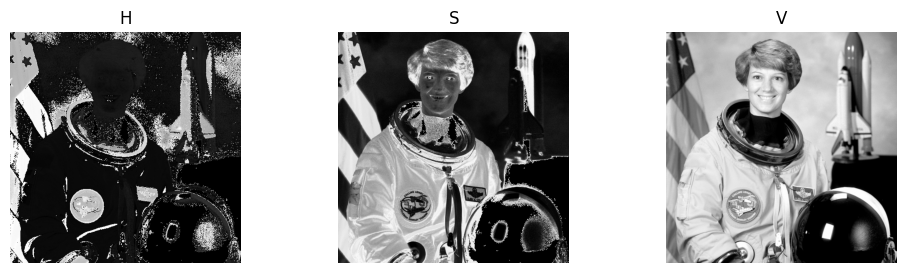

In [9]:
# Task 5.1: HSV conversion and channel display
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H, S, V = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

plt.figure(figsize=(12, 3))
for i, (ch, name) in enumerate([(H, "H"), (S, "S"), (V, "V")], start=1):
    plt.subplot(1, 3, i)
    plt.imshow(ch, cmap="gray")
    plt.title(name)
    plt.axis("off")
plt.show()


## Task 6) Lab 2 Arithmetic Operations

This section applies basic arithmetic operations safely on `uint8` images.

### Task 6.1 — Subtract an Intensity (Darkening)


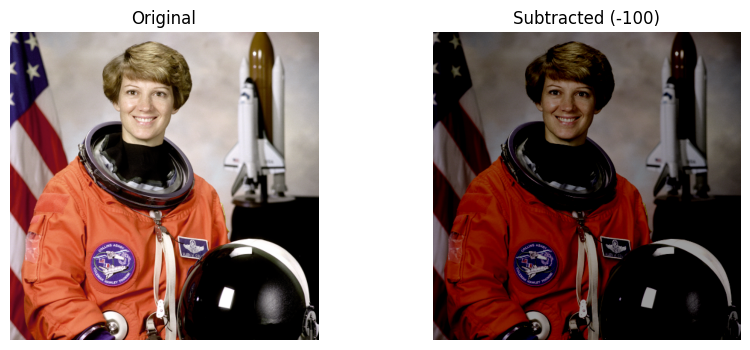

In [10]:
# Task 6.1: subtract intensity from all channels
sub_val = 100
img_sub = cv2.subtract(img, sub_val)

show_side_by_side(img, img_sub, "Original", f"Subtracted (-{sub_val})")


**Task 6.1 (Answer):**
- Increasing `sub_val` lowers more pixel values toward `0`, so the image appears darker.
- Darkening occurs because subtraction reduces intensity in all three RGB channels, with saturation at `0` preventing underflow.


### Task 6.2 — Subtract from Red Channel Only
Subtract a constant from the **R** channel while keeping **G** and **B** unchanged.


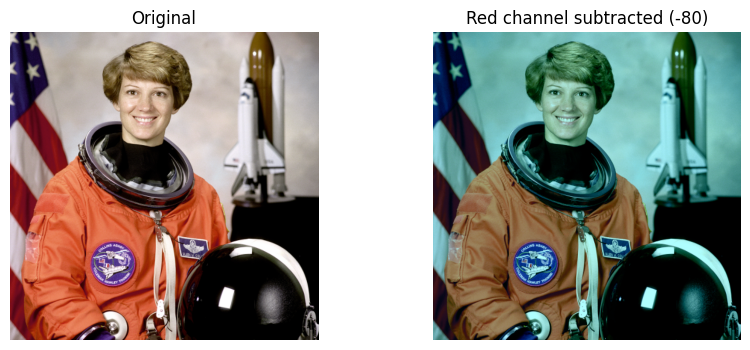

In [11]:
# Task 6.2: subtract from Red channel only
sub_val_r = 80

img_red_only = img.copy()
# RGB channel order: 0=R, 1=G, 2=B
img_red_only[:, :, 0] = cv2.subtract(img_red_only[:, :, 0], sub_val_r)

show_side_by_side(img, img_red_only, "Original", f"Red channel subtracted (-{sub_val_r})")


### Task 6.3 — Add an Intensity (Brightening)


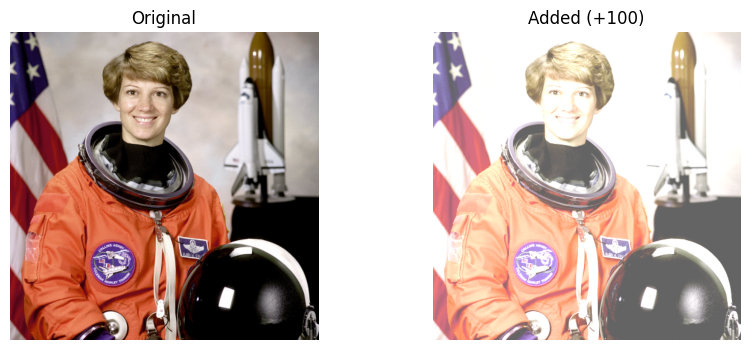

In [12]:
# Task 6.3: add intensity to all channels
add_val = 100
img_add = cv2.add(img, add_val)

show_side_by_side(img, img_add, "Original", f"Added (+{add_val})")


**Task 6.3 (Answer):**
- Increasing `add_val` pushes pixel values toward `255`, making the image brighter.
- Brightening happens because intensity is added to all channels; values clamp at `255` due to saturation.


### Task 6.4 — Add to Red Channel Only


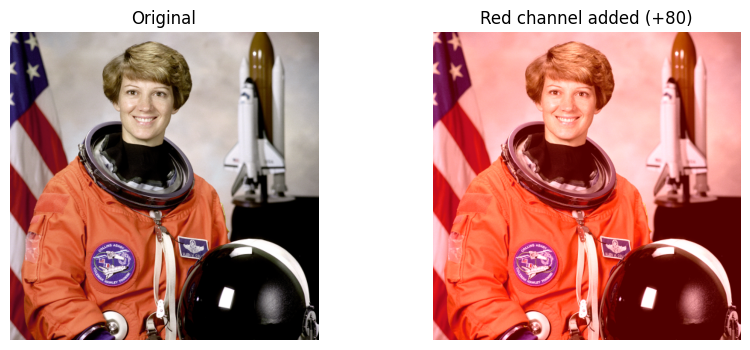

In [13]:
# Task 6.4: add to Red channel only
add_val_r = 80

img_red_only_add = img.copy()
img_red_only_add[:, :, 0] = cv2.add(img_red_only_add[:, :, 0], add_val_r)

show_side_by_side(img, img_red_only_add, "Original", f"Red channel added (+{add_val_r})")


### Task 6.5 — Multiply by a Constant
Use float arithmetic, then clip to `uint8` range for display.


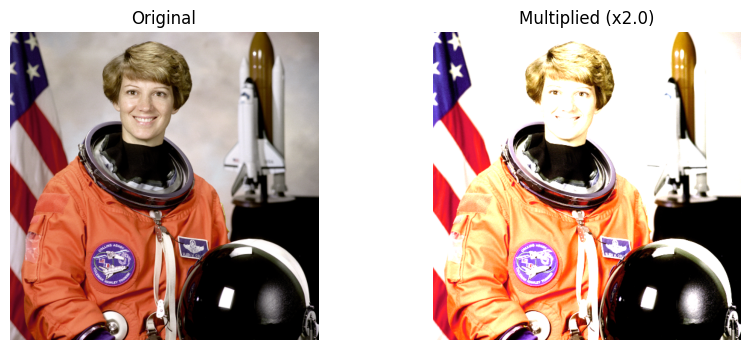

In [14]:
# Task 6.5: multiply by constant and clip to uint8
factor = 2.0

img_f = img.astype(np.float32)
img_mul = clip_uint8(cv2.multiply(img_f, factor))

show_side_by_side(img, img_mul, "Original", f"Multiplied (x{factor})")


**Task 6.5 (Answer):**
- A factor `> 1` increases brightness/contrast but can saturate highlights.
- A factor `< 1` reduces intensity and contrast, making the image dimmer.


### Task 6.6 — Divide by a Constant
Dividing by values `> 1` darkens; dividing by values `< 1` brightens and may saturate.


In [ ]:
# Task 6.6: divide by constant and clip to uint8
divisor = 2.0

img_f = img.astype(np.float32)
img_div = clip_uint8(cv2.divide(img_f, divisor))

show_side_by_side(img, img_div, "Original", f"Divided (/{divisor})")


**Task 6.6 (Answer):**
- Dividing by a number greater than `1` decreases pixel intensities, so the image gets darker.
- Dividing by a number less than `1` is equivalent to scaling up, so the image gets brighter and can clip to `255`.


## Task 7) Mini-Report

**Report:**
In this Week 3 task set, I practiced the full basic image-processing pipeline using OpenCV and NumPy. I started by loading an RGB image and checking pixel values to understand how color is encoded per channel. Then I saved and reloaded the image to verify that shape and dtype stayed consistent after I/O. Converting RGB to grayscale showed how single-channel intensity simplifies later processing. I compared manual thresholding with Otsu thresholding and observed that Otsu usually gives a cleaner split because it adapts to histogram structure. For ROI cropping, I used array slicing with `[y, x]` indexing and confirmed the cropped region dimensions. In color-space analysis, HSV channels helped separate hue, saturation, and brightness information more clearly than RGB. Finally, I applied arithmetic operations (add, subtract, multiply, divide) on full images and the red channel only. The most useful part was channel-wise arithmetic, because it provides controlled color changes while preserving other channels. Main implementation issues were remembering RGB/BGR conventions and safely handling `uint8` clipping.


## Submission Checklist
1. Completed Week 3 task notebook (`.ipynb`).
2. Outputs for RGB image, grayscale, binary thresholding, ROI crop, HSV channels, and arithmetic operations.
3. Markdown answers filled for Tasks 2.1, 3.2, 4.2, 6.1, 6.3, 6.5, 6.6, and mini-report.


In [15]:
print("Week 3 tasks completed successfully.")


Week 3 tasks completed successfully.
